In [286]:
import pandas as pd
import matplotlib.pyplot as plt

In [287]:
df=pd.read_excel('regionalgrossdomesticproductgdpallitlregions.xlsx',sheet_name='Table 11',header=1)

In [288]:
df[0:50]

,ITL,ITL code,Region name,1998,1999,2000,2001,2002,2003,2004,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,UK,UK,United Kingdom,25955,26642,27637,28125,28501,29258,29787,...,30195,30552,31290,31786,32208,32799,33160,33510,29687,31947
1,Other,TLB,England,25274,26128,27199,27591,27919,28673,29199,...,30733,31167,31978,32388,32867,33472,33813,34159,30089,32763
2,ITL1,TLC,North East,17389,17900,18434,19214,19986,20703,21756,...,22399,22243,22657,23366,23259,23631,23866,24257,20946,23207
3,ITL2,TLC1,Tees Valley and Durham,16438,17312,17825,18192,18753,19623,20408,...,20765,20639,21025,21804,21488,21423,21882,22150,19521,21597
4,ITL3,TLC11,Hartlepool and Stockton-on-Tees,21360,22461,22511,22597,22944,23864,24667,...,24312,24379,24574,25933,26193,25495,25325,25806,23425,25496
5,ITL3,TLC12,South Teesside,16410,17119,17513,17313,17659,18504,18975,...,19611,19114,19556,20213,20079,19693,20435,20274,17031,18993
6,ITL3,TLC13,Darlington,9860,10628,12259,13617,14779,16175,17621,...,19981,20231,23657,26188,25394,25787,26875,26760,22629,24400
7,ITL3,TLC14,Durham CC,17203,18074,18404,18760,19192,19860,20684,...,19918,19645,19380,19412,19010,19219,19872,20200,18160,20383
8,ITL2,TLC2,"Northumberland, and Tyne and Wear",18166,18379,18933,20054,21001,21593,22870,...,23752,23571,24007,24661,24724,25454,25502,25993,22120,24542
9,ITL3,TLC21,Northumberland,16944,17182,17356,17950,18721,18941,19830,...,19129,19143,19545,19709,19636,19746,19631,20194,17687,19391


In [289]:
#Creates a TLi column in the dataframe and asigns a value
#corresponsing to the regions's row. It will be used later on to create a multiindex
def region_clasification(df,reg_class_name):
    #Creates the ITLi column in the dataframe
    df.insert(loc=0,column=reg_class_name,value=pd.NA)
    #Identifies the indexes where the region names are located
    reg_class_index=df[df['ITL']==reg_class_name].index
    
    

    #Asigns the correct region names to their correct subregion rows
    #The way is takin a slice of indexes reg_class_index[i]:reg_class_index[i+1] and asigning
    #the region name to the extra column created in the dataframe.
    for i in range(0,len(reg_class_index)-1):
        df.loc[reg_class_index[i]:reg_class_index[i+1]-1,reg_class_name]=df.loc[reg_class_index[i],'Region name']
    df.loc[reg_class_index[-1]:,reg_class_name]=df.loc[reg_class_index[-1],'Region name']
    return df

df=(
    region_clasification(df,'ITL1')
    .pipe(lambda df:df[df['ITL']!='ITL1'])
    .pipe(lambda df:region_clasification(df,'ITL2'))
    .pipe(lambda df:df[df['ITL']!='ITL2'])
    .pipe(lambda df:df.iloc[2:,:])
    .set_index(keys=['ITL1','ITL2','Region name'])
    .drop(columns=['ITL','ITL code'])
    .T
)

<Axes: title={'center': 'City of Edinburgh'}>

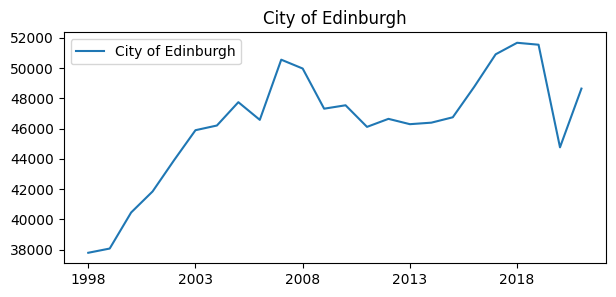

In [304]:
df['Scotland']['Eastern Scotland']['City of Edinburgh'].plot(figsize=(7,3),title="City of Edinburgh")